# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df['sales_channel'] = pd.factorize(df['sales_channel'])[0]
df['trip_type'] = pd.factorize(df['trip_type'])[0]
df['booking_origin'] = pd.factorize(df['booking_origin'])[0]
df['route'] = pd.factorize(df['route'])[0]

In [8]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,0.017800,84.940480,23.04456,9.06634,3.814420,350.269380,20.004220,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,202.830559,16.711689,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,5.00000,5.00000,2.000000,184.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,0.000000,51.000000,17.00000,9.00000,4.000000,341.000000,10.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,0.000000,115.000000,28.00000,13.00000,5.000000,541.000000,36.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


In [10]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,0,0,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,0,0,5.52,0
2,2,0,0,243,22,17,3,0,1,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,0,0,1,5.52,0
4,2,0,0,68,22,15,3,0,1,1,0,1,5.52,0


In [11]:
correlation = df.corr()['booking_complete'].drop('booking_complete')
correlation

num_passengers           0.024116
sales_channel           -0.041060
trip_type               -0.027215
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_hour              0.007127
flight_day              -0.006986
route                   -0.006529
booking_origin          -0.160146
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
flight_duration         -0.106266
Name: booking_complete, dtype: float64

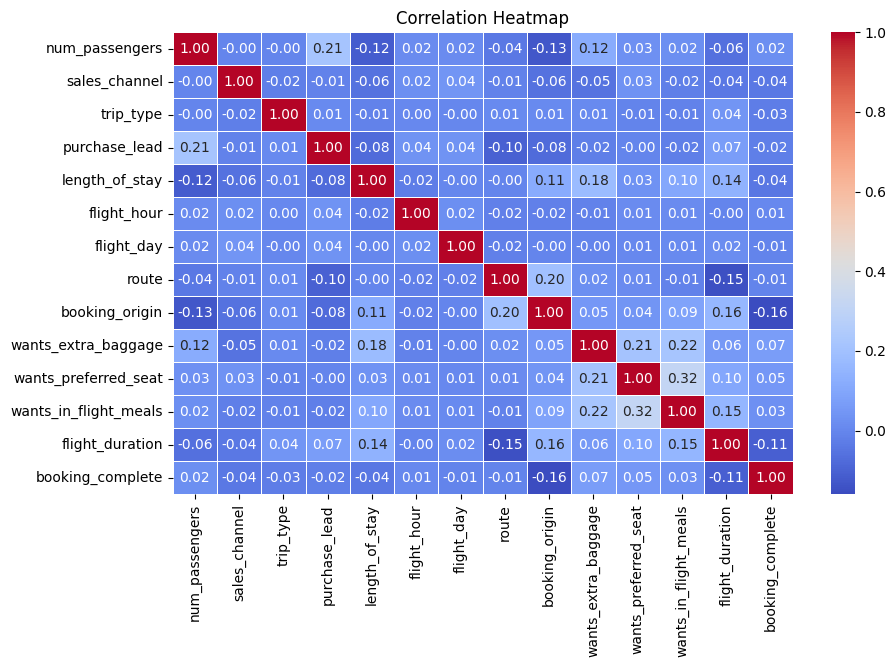

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # Add XGBoost

# Split data into features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Define classifiers, now with XGBoost included
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()  # Add XGBoost Classifier
}

<Figure size 1200x800 with 0 Axes>

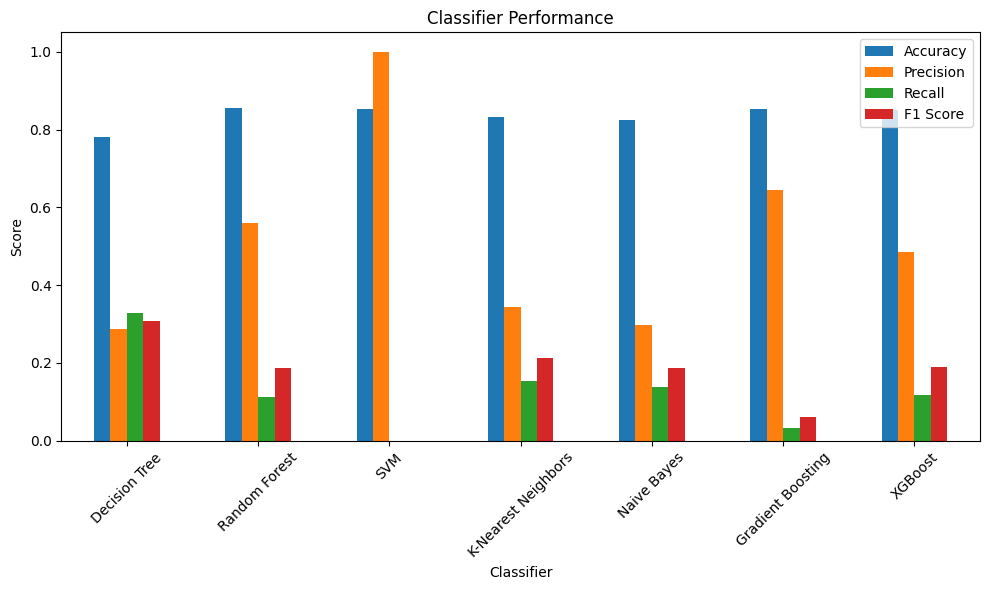

In [15]:
# Dictionary to store the results
metrics = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train, test, and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    metrics['Classifier'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, zero_division=1))
    metrics['Recall'].append(recall_score(y_test, y_pred, zero_division=1))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, zero_division=1))

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(12, 8))
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(10, 6))
plt.title('Classifier Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


            Classifier  Accuracy  Precision    Recall  F1 Score   
0        Decision Tree    0.7810   0.293124  0.339865  0.314768  \
1        Random Forest    0.8553   0.556314  0.110135  0.183869   
2                  SVM    0.8520   1.000000  0.000000  0.000000   
3  K-Nearest Neighbors    0.8312   0.342900  0.153378  0.211951   
4          Naive Bayes    0.8245   0.298091  0.137162  0.187876   
5    Gradient Boosting    0.8541   0.643836  0.031757  0.060528   
6              XGBoost    0.8510   0.485955  0.116892  0.188453   

   Book Percentage (%)  Not Book Percentage (%)  
0                17.16                    82.84  
1                 2.93                    97.07  
2                 0.00                   100.00  
3                 6.62                    93.38  
4                 6.81                    93.19  
5                 0.73                    99.27  
6                 3.56                    96.44  


<Figure size 1200x800 with 0 Axes>

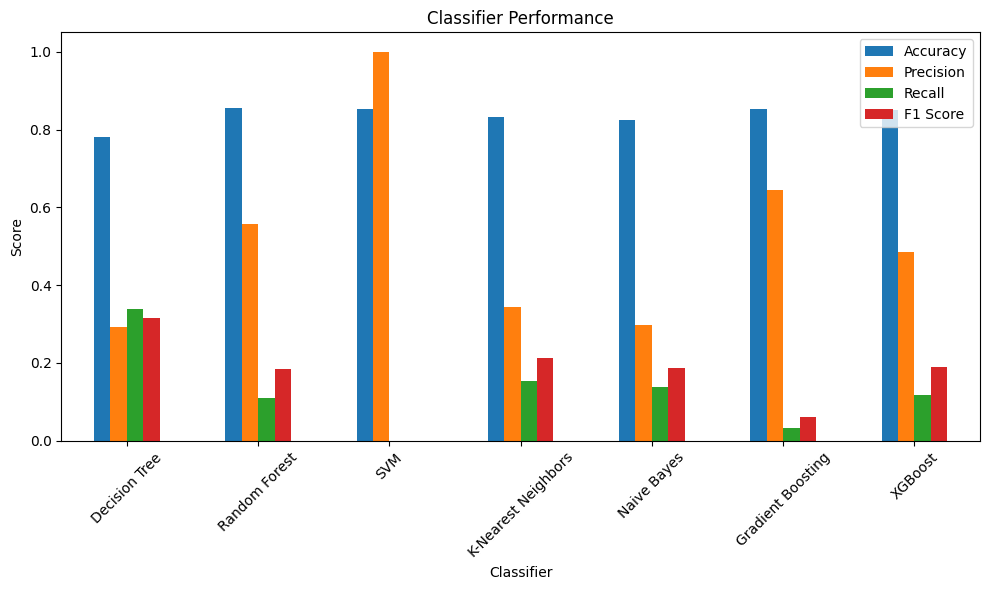

<Figure size 1200x800 with 0 Axes>

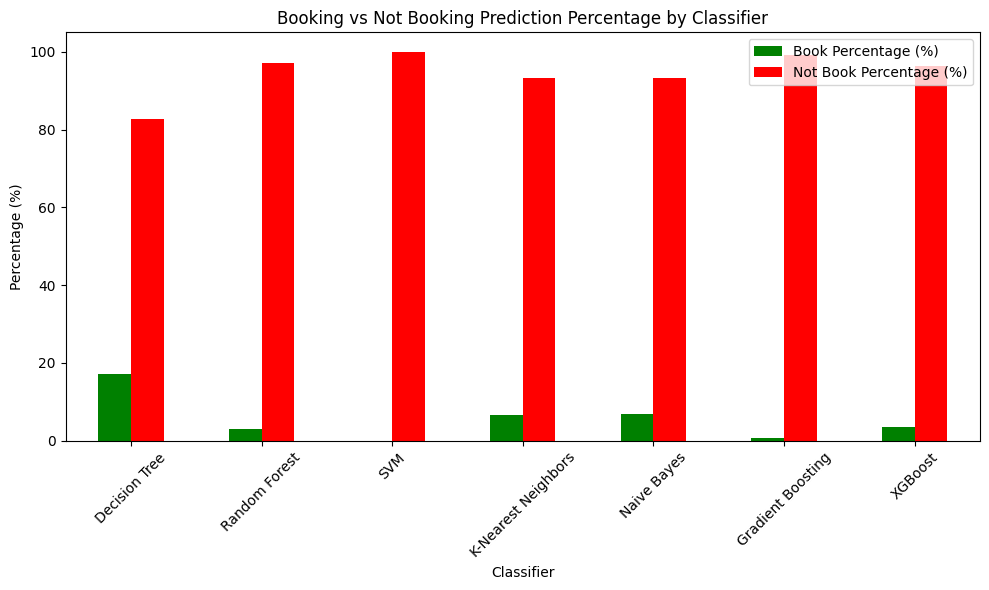

In [16]:
# Define classifiers, now with XGBoost included
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()  # Add XGBoost Classifier
}

# Dictionary to store the results
metrics = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Book Percentage (%)': [],
    'Not Book Percentage (%)': []
}

# Train, test, and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate percentage of people predicted to book (1) and not book (0)
    total = len(y_pred)
    book_percentage = (np.sum(y_pred == 1) / total) * 100
    not_book_percentage = (np.sum(y_pred == 0) / total) * 100

    metrics['Classifier'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, zero_division=1))
    metrics['Recall'].append(recall_score(y_test, y_pred, zero_division=1))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, zero_division=1))
    metrics['Book Percentage (%)'].append(book_percentage)
    metrics['Not Book Percentage (%)'].append(not_book_percentage)

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the classification metrics including the booking percentages
print(metrics_df)

# Plot the metrics (Accuracy, Precision, Recall, F1 Score)
plt.figure(figsize=(12, 8))
metrics_df.set_index('Classifier')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classifier Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Plot the booking percentages
plt.figure(figsize=(12, 8))
metrics_df.set_index('Classifier')[['Book Percentage (%)', 'Not Book Percentage (%)']].plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Booking vs Not Booking Prediction Percentage by Classifier')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [17]:
# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()  # Add XGBoost Classifier
}

# Dictionary to store the results
metrics = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Book Percentage (%)': [],
    'Not Book Percentage (%)': []
}

# Train, test, and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate percentage of people predicted to book (1) and not book (0)
    total = len(y_pred)
    book_percentage = (np.sum(y_pred == 1) / total) * 100
    not_book_percentage = (np.sum(y_pred == 0) / total) * 100

    metrics['Classifier'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, zero_division=1))
    metrics['Recall'].append(recall_score(y_test, y_pred, zero_division=1))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, zero_division=1))
    metrics['Book Percentage (%)'].append(book_percentage)
    metrics['Not Book Percentage (%)'].append(not_book_percentage)

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the results as a table
print(metrics_df.to_string(index=False))


         Classifier  Accuracy  Precision   Recall  F1 Score  Book Percentage (%)  Not Book Percentage (%)
      Decision Tree    0.7787   0.281715 0.319595  0.299462                16.79                    83.21
      Random Forest    0.8543   0.538983 0.107432  0.179155                 2.95                    97.05
                SVM    0.8520   1.000000 0.000000  0.000000                 0.00                   100.00
K-Nearest Neighbors    0.8312   0.342900 0.153378  0.211951                 6.62                    93.38
        Naive Bayes    0.8245   0.298091 0.137162  0.187876                 6.81                    93.19
  Gradient Boosting    0.8541   0.643836 0.031757  0.060528                 0.73                    99.27
            XGBoost    0.8510   0.485955 0.116892  0.188453                 3.56                    96.44


C:\Users\thehu\AppData\Local\Temp\ipykernel_4192\2138872058.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette='viridis')


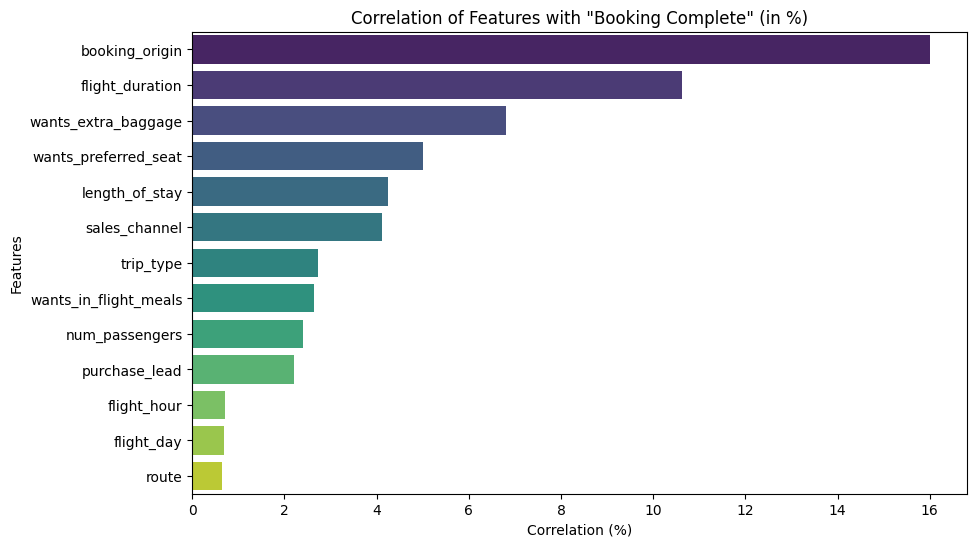

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract the correlation of all columns with the output 'booking_complete'
corr_to_output = corr_matrix['booking_complete'].drop('booking_complete')

# Convert correlations to positive percentages
corr_to_output_percentage = corr_to_output.abs() * 100

# Sort the correlations in descending order
corr_sorted = corr_to_output_percentage.sort_values(ascending=False)

# Plot the correlations as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette='viridis')
plt.title('Correlation of Features with "Booking Complete" (in %)')
plt.xlabel('Correlation (%)')
plt.ylabel('Features')
plt.show()


In [19]:
output_csv = metrics_df.to_csv('output_csv', index=True)